In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print(f"X_train_full data type:{X_train_full.dtype},\n X_train_full shape:{X_train_full.shape}")

X_train_full data type:uint8,
 X_train_full shape:(60000, 28, 28)


In [4]:
X_test.shape

(10000, 28, 28)

In [6]:
len(X_test[0][1])

28

In [7]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

In [8]:
len(X_train)

55000

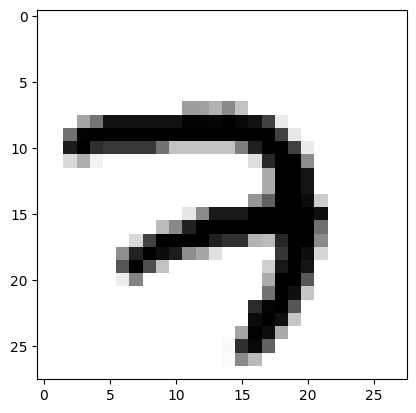

In [9]:
plt.imshow(X_train[0],cmap="binary")
plt.show()

<Axes: >

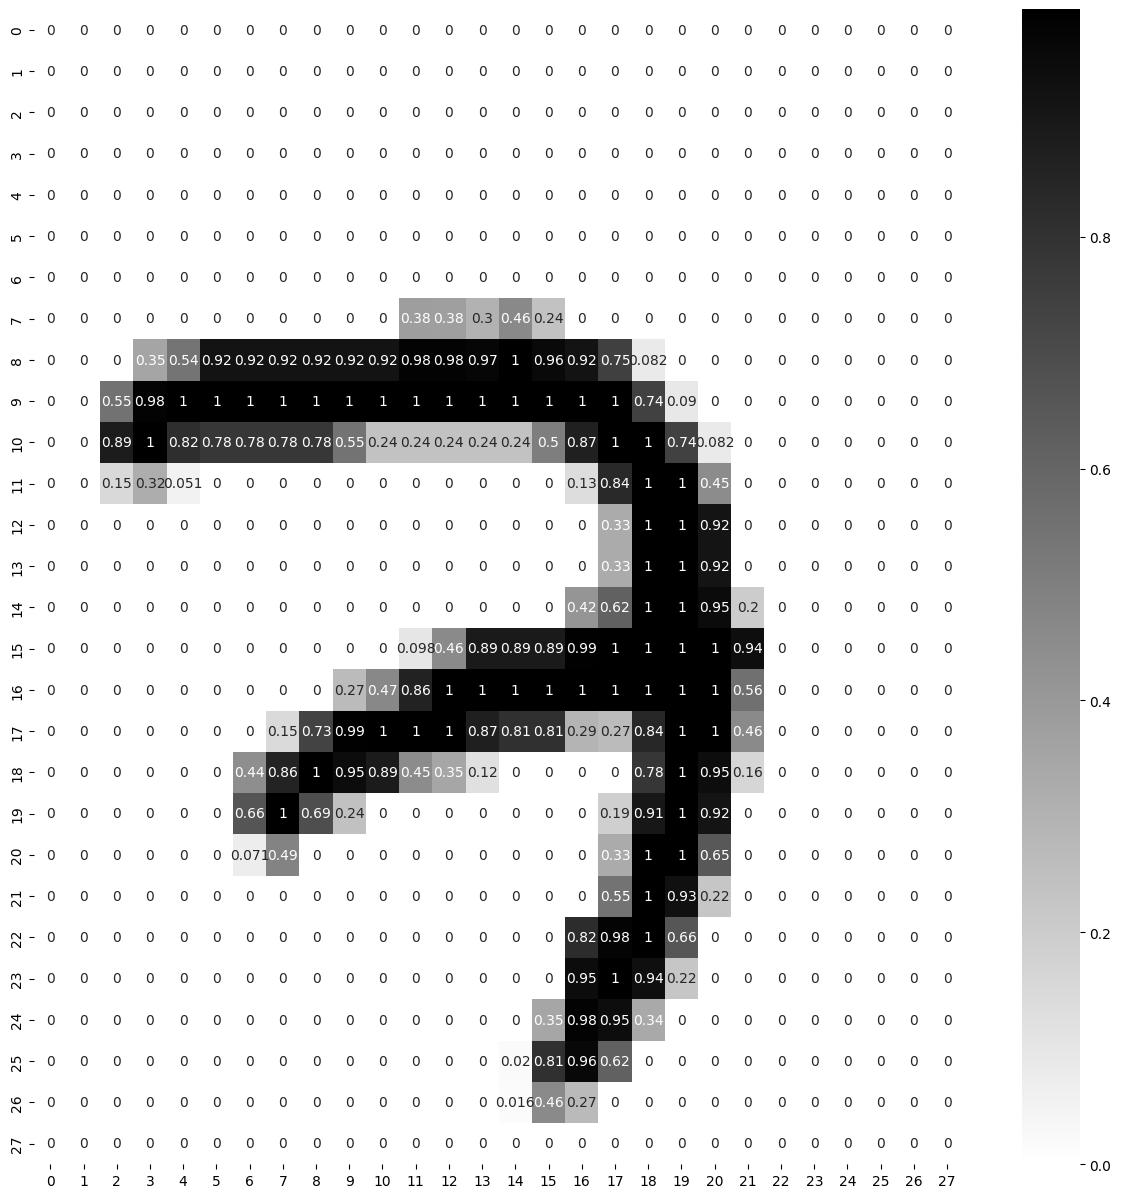

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [13]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")]

model_cm=tf.keras.models.Sequential(Layers)

In [15]:
model_cm.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [17]:
model_cm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hidden1=model_cm.layers[1]
hidden1.name

'hiddenLayer1'

In [20]:
len(hidden1.get_weights()[1])

300

In [21]:
hidden1.get_weights()

[array([[-0.04655456,  0.06954528,  0.03576569, ..., -0.04420926,
         -0.04227003,  0.03771829],
        [-0.03187405, -0.04643786, -0.00041311, ..., -0.02806661,
          0.03448869, -0.04883916],
        [-0.05612796,  0.02034669, -0.04203941, ..., -0.07211851,
         -0.0365392 , -0.02068915],
        ...,
        [-0.00922957, -0.02499427, -0.02337886, ...,  0.05163713,
          0.02751718,  0.02236222],
        [ 0.0506351 , -0.06197514,  0.05212329, ...,  0.07146928,
         -0.04827155, -0.07274356],
        [-0.00558794, -0.06125925,  0.02717309, ...,  0.0551935 ,
          0.01284093,  0.04162819]], shape=(784, 300), dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 

In [22]:
weights, biases = hidden1.get_weights()
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.04655456,  0.06954528,  0.03576569, ..., -0.04420926,
        -0.04227003,  0.03771829],
       [-0.03187405, -0.04643786, -0.00041311, ..., -0.02806661,
         0.03448869, -0.04883916],
       [-0.05612796,  0.02034669, -0.04203941, ..., -0.07211851,
        -0.0365392 , -0.02068915],
       ...,
       [-0.00922957, -0.02499427, -0.02337886, ...,  0.05163713,
         0.02751718,  0.02236222],
       [ 0.0506351 , -0.06197514,  0.05212329, ...,  0.07146928,
        -0.04827155, -0.07274356],
       [-0.00558794, -0.06125925,  0.02717309, ...,  0.0551935 ,
         0.01284093,  0.04162819]], shape=(784, 300), dtype=float32)

In [24]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_cm.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [26]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_cm.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8412 - loss: 0.6084 - val_accuracy: 0.9170 - val_loss: 0.3057
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2841 - val_accuracy: 0.9304 - val_loss: 0.2424
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9333 - loss: 0.2330 - val_accuracy: 0.9440 - val_loss: 0.2027
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9439 - loss: 0.1990 - val_accuracy: 0.9514 - val_loss: 0.1764
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9506 - loss: 0.1726 - val_accuracy: 0.9566 - val_loss: 0.1634
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9571 - loss: 0.1521 - val_accuracy: 0.9628 - val_loss: 0.1411
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9620 - loss: 0.1353 - val_accuracy: 0.9656 - val_loss: 0.1301
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9650 - loss: 0.1218 - 

In [27]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [28]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.841218,0.608380,0.9170,0.305692
1,0.919455,0.284147,0.9304,0.242403
2,0.933255,0.232986,0.9440,0.202715
3,0.943945,0.198975,0.9514,0.176353
4,0.950618,0.172648,0.9566,0.163420
5,0.957127,0.152110,0.9628,0.141139
6,0.961964,0.135301,0.9656,0.130139
7,0.965000,0.121775,0.9668,0.124461
8,0.968491,0.110590,0.9712,0.111231
9,0.971109,0.101088,0.9720,0.104594


<Axes: >

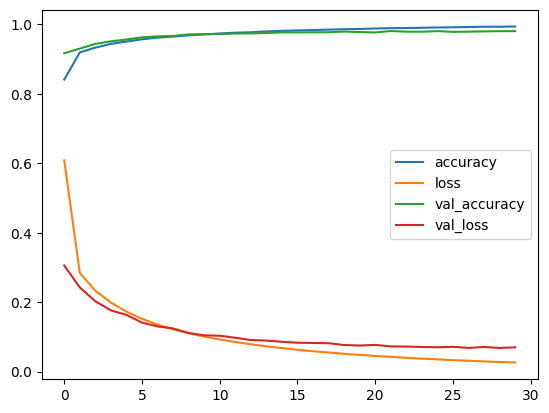

In [29]:
pd.DataFrame(history.history).plot()

In [30]:
model_cm.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9786 - loss: 0.0687


[0.06871309876441956, 0.978600025177002]

In [31]:
x_new = X_test[:3]

In [32]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [33]:
y_prob = model_cm.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.995, 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.002,
        0.   ]], dtype=float32)

In [34]:
y_prob

array([[1.31310605e-06, 4.85163582e-07, 6.86202184e-05, 8.86949070e-04,
        6.59028654e-09, 2.41443922e-06, 7.25271024e-11, 9.99028087e-01,
        3.01189016e-06, 8.96403253e-06],
       [1.40322004e-06, 2.22763847e-04, 9.99666929e-01, 6.92193353e-05,
        6.28736971e-13, 1.12491739e-06, 3.09578240e-06, 8.88184925e-12,
        3.54587610e-05, 1.84556537e-12],
       [8.74608759e-06, 9.94764686e-01, 1.01382937e-03, 2.26752691e-05,
        2.46797339e-04, 1.39159065e-05, 4.31784065e-05, 2.31938413e-03,
        1.56344182e-03, 3.26924032e-06]], dtype=float32)

In [35]:
y_pred = np.argmax(y_prob, axis = -1)

In [36]:
y_pred


array([7, 2, 1])

In [37]:
actual


array([7, 2, 1], dtype=uint8)

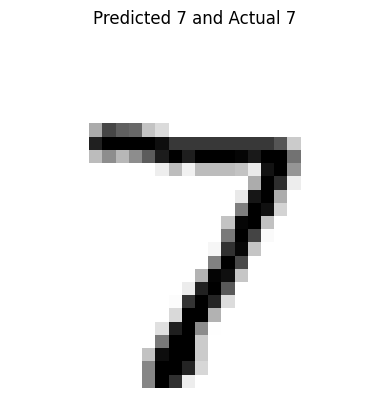

######################


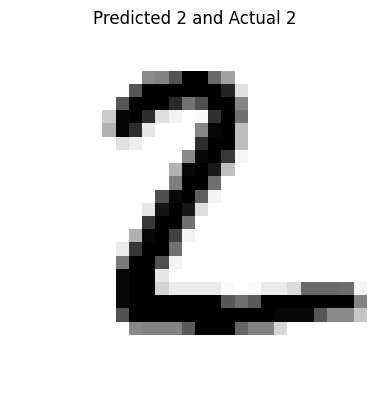

######################


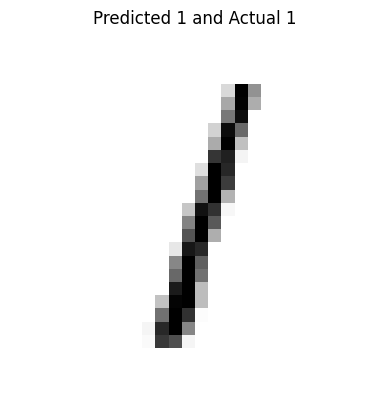

######################


In [38]:
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")